# IT5100F - Assignment 1
Semester: AY2024/2025 Semester 1

## Administrative instructions
- Register your team on Canvas
- Once you have completed the assignment, download the `.ipynb` file, rename it as per the submission requirement and upload it to Canvas
- Enter the team details below

## Team submitting the assignment

|Team member | Name | NUSNet ID (exxxxxxx) | Student number (AxxxxxxxZ) |
|------------|------|----------------------|----------------------------|
| 1 |    Dong Suhong           |     E1326008                 |   A0290555Y                         |
| 2 |   Shi Ruyi            |      E1326003                |    A0290550J                         |
| 3 |      Tan Changjie          |     E1330333                 |      A0291194Y                      |
| 4 |     Zhang Haochen          |      E1326060                 |     A0290607A                       |

## Programming instructions
- Make Sure to keep the variable names as they are
- You are allowed to use the following libraries: NumPy, Pandas, Scikit-learn, Matplotlib, Seaborn, SciPy, and Statsmodels


## Dataset
- Endomondo Dataset comprises of sport records from Endomondo, a fitness tracking website.
    - It includes sensory data such as heart rate, speed, and longitude, collected from various users during different workouts.

- Download the dataset from the following link: [Endomondo dataset](https://drive.google.com/file/d/1HLgCkCIBmkso2kGzGDHVTtlLzPBEsh_m/view?usp=drive_link)


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1: Data Preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#### 1.1 Data Loading

Load the dataset to a data frame using `read_json`

In [3]:
# TODO: Complete the code here
file_path = '/content/drive/MyDrive/IT5100F/endomondo_proper.json'

endomondo_df = pd.read_json(file_path, lines=True)
endomondo_df.head()


,altitude,heart_rate,id,latitude,longitude,speed,sport,timestamp
0,"[41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....","[100, 111, 120, 119, 120, 116, 125, 128, 131, ...",396826535.0,"[60.1733487658, 60.1732398011, 60.1729802135, ...","[24.6497704089, 24.650142733, 24.650910683, 24...","[6.8652, 16.4736, 19.1988, 20.4804, 31.3956, 3...",bike,"[1408898746, 1408898754, 1408898765, 140889877..."
1,"[38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....","[100, 105, 111, 110, 108, 115, 126, 130, 132, ...",392337038.0,"[60.1732475962, 60.1732096262, 60.1729796268, ...","[24.6498552337, 24.6501554735, 24.6508813463, ...","[9.0792, 13.284, 15.9336, 10.9476, 16.1676, 30...",bike,"[1408221682, 1408221687, 1408221699, 140822170..."
2,"[28.6, 29.4, 29.4, 29.4, 28.0, 27.0, 25.2, 23....","[99, 105, 113, 109, 112, 116, 116, 114, 114, 1...",386729739.0,"[60.1732862368, 60.1732394658, 60.1730676368, ...","[24.6498743445, 24.6502427291, 24.6508224215, ...","[7.4988, 15.4008, 17.8668, 21.5712, 24.1416, 3...",bike,"[1407432042, 1407432048, 1407432056, 140743206..."
3,"[24.0, 24.0, 24.0, 21.0, 18.6, 17.4, 17.4, 17....","[118, 118, 119, 120, 122, 124, 126, 129, 133, ...",381185226.0,"[60.173279196, 60.1732723229, 60.1732617617, 6...","[24.6498169284, 24.6498684771, 24.6500092093, ...","[7.218, 9.8208, 14.3532, 16.2972, 20.1276, 20....",bike (transport),"[1406647079, 1406647080, 1406647082, 140664708..."
4,"[21.2, 22.0, 22.0, 20.6, 19.8, 19.4, 17.6, 15....","[100, 98, 104, 104, 107, 109, 108, 105, 105, 1...",371302193.0,"[60.1732459199, 60.173199987, 60.1730691455, 6...","[24.650183385200002, 24.6504225209, 24.6508663...","[16.4124, 11.682, 18.162, 21.7728, 24.408, 26....",bike,"[1405100572, 1405100576, 1405100582, 140510059..."


#### 1.2 Data Cleaning
Dealing with null values.

In [4]:
# TODO: Find the total number of missing rows with null values in any column
total_missing = endomondo_df.isnull().any(axis=1).sum()
# Print the total number of missing values
print(total_missing)

2000


In [5]:
# TODO: Clean the data by removing rows with missing values
endomondo_cleaned_df = endomondo_df.dropna()
# Print the shape of the cleaned dataframe to check the number of remaining rows
print(f"Cleaned data has {endomondo_cleaned_df.shape[0]} rows and {endomondo_cleaned_df.shape[1]} columns.")

Cleaned data has 19391 rows and 8 columns.


In [6]:
# TODO: Check the results of data cleaning

# Check if there are any remaining null values in the cleaned dataset
remaining_nulls = endomondo_cleaned_df.isnull().sum().sum()
print(f"Remaining null values after cleaning: {remaining_nulls}")

# Print the shape of the cleaned data (number of rows and columns)
print(f"Cleaned data shape: {endomondo_cleaned_df.shape}")

# Display the first few rows of the cleaned data to verify its integrity
print(endomondo_cleaned_df.head())


Remaining null values after cleaning: 0
Cleaned data shape: (19391, 8)
                                            altitude  \
0  [41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....   
1  [38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....   
2  [28.6, 29.4, 29.4, 29.4, 28.0, 27.0, 25.2, 23....   
3  [24.0, 24.0, 24.0, 21.0, 18.6, 17.4, 17.4, 17....   
4  [21.2, 22.0, 22.0, 20.6, 19.8, 19.4, 17.6, 15....   

                                          heart_rate           id  \
0  [100, 111, 120, 119, 120, 116, 125, 128, 131, ...  396826535.0   
1  [100, 105, 111, 110, 108, 115, 126, 130, 132, ...  392337038.0   
2  [99, 105, 113, 109, 112, 116, 116, 114, 114, 1...  386729739.0   
3  [118, 118, 119, 120, 122, 124, 126, 129, 133, ...  381185226.0   
4  [100, 98, 104, 104, 107, 109, 108, 105, 105, 1...  371302193.0   

                                            latitude  \
0  [60.1733487658, 60.1732398011, 60.1729802135, ...   
1  [60.1732475962, 60.1732096262, 60.1729796268, ...   
2  [60.17

In [8]:
# TODO: Ensure consistency by verifying that the number of entries in the altitude, latitude, longitude, timestamp, heart_rate, and speed arrays is the same for each id

# Calculate the lengths of each relevant column
altitude_lens = endomondo_cleaned_df['altitude'].apply(len)
heart_rate_lens = endomondo_cleaned_df['heart_rate'].apply(len)
speed_lens = endomondo_cleaned_df['speed'].apply(len)
latitude_lens = endomondo_cleaned_df['latitude'].apply(len)
longitude_lens = endomondo_cleaned_df['longitude'].apply(len)
timestamp_lens = endomondo_cleaned_df['timestamp'].apply(len)

# Verify if all lengths are equal
if (altitude_lens.equals(heart_rate_lens) and
    heart_rate_lens.equals(speed_lens) and
    speed_lens.equals(latitude_lens) and
    latitude_lens.equals(longitude_lens) and
    longitude_lens.equals(timestamp_lens)):
    print("All entries have consistent lengths.")
else:
    print("Inconsistency found in the length of data columns.")


All entries have consistent lengths.


In [9]:
# Check if there are any rows with len(latitude) != len(longitude) != len(altitude) != len(timestamp) != len(heart_rate) != len(speed)
inconsistent_rows = endomondo_cleaned_df[(altitude_lens != heart_rate_lens) | (altitude_lens != speed_lens) | (altitude_lens != latitude_lens) | (altitude_lens != longitude_lens) | (altitude_lens != timestamp_lens) | (latitude_lens != longitude_lens) | (latitude_lens != timestamp_lens) | (latitude_lens != heart_rate_lens) | (latitude_lens != speed_lens) | (longitude_lens != timestamp_lens) | (longitude_lens != heart_rate_lens) | (longitude_lens != speed_lens) | (timestamp_lens != heart_rate_lens) | (timestamp_lens != speed_lens) | (heart_rate_lens != speed_lens)]

# Print the inconsistent rows
print(inconsistent_rows)

Empty DataFrame
Columns: [altitude, heart_rate, id, latitude, longitude, speed, sport, timestamp]
Index: []


In [10]:
# TODO: Transform the dataset by expanding each array (altitude, latitude, longitude, timestamp, heart_rate, speed)
# associated with id into individual columns, making sure each column holds a single value from the array.

# Explode each array column to expand them into individual rows
endomondo_expanded_df = endomondo_cleaned_df.explode(['altitude', 'latitude', 'longitude', 'timestamp', 'heart_rate', 'speed'])

# Reset the index after explosion to ensure clean indices
endomondo_expanded_df = endomondo_expanded_df.reset_index(drop=True)

# Print the first few rows to check the transformation
print(endomondo_expanded_df.head())


  altitude heart_rate           id   latitude  longitude    speed sport  \
0     41.6        100  396826535.0  60.173349   24.64977   6.8652  bike   
1     40.6        111  396826535.0   60.17324  24.650143  16.4736  bike   
2     40.6        120  396826535.0   60.17298  24.650911  19.1988  bike   
3     38.4        119  396826535.0  60.172478  24.650669  20.4804  bike   
4     37.0        120  396826535.0  60.171861  24.649145  31.3956  bike   

    timestamp  
0  1408898746  
1  1408898754  
2  1408898765  
3  1408898778  
4  1408898794  


In [11]:
# TODO: Convert the timestamp column from seconds to a datetime object.
endomondo_expanded_df["timestamp"] = pd.to_datetime(endomondo_expanded_df["timestamp"], unit='s')

# Print the first few rows to verify the conversion
print(endomondo_expanded_df[["timestamp"]].head())


            timestamp
0 2014-08-24 16:45:46
1 2014-08-24 16:45:54
2 2014-08-24 16:46:05
3 2014-08-24 16:46:18
4 2014-08-24 16:46:34


In [12]:
# Inspect the data
endomondo_expanded_df.head()

,altitude,heart_rate,id,latitude,longitude,speed,sport,timestamp
0,41.6,100,396826535.0,60.173349,24.64977,6.8652,bike,2014-08-24 16:45:46
1,40.6,111,396826535.0,60.17324,24.650143,16.4736,bike,2014-08-24 16:45:54
2,40.6,120,396826535.0,60.17298,24.650911,19.1988,bike,2014-08-24 16:46:05
3,38.4,119,396826535.0,60.172478,24.650669,20.4804,bike,2014-08-24 16:46:18
4,37.0,120,396826535.0,60.171861,24.649145,31.3956,bike,2014-08-24 16:46:34


In [20]:
# TODO: Check and ensure there are no null values in the dataset after the transformation.
total_missing = endomondo_expanded_df.isnull().sum().sum()

# Print the total number of missing values
print(total_missing)


0


#### 1.4 Data Storage

Save the processed data for further use

In [19]:
CSV_FILE_NAME = "endomondo_proper_cleaned_expanded.csv"
# TODO 1: Save the cleaned and transformed dataset to a new CSV file with the CSV_FILE_NAME
endomondo_expanded_df.to_csv(CSV_FILE_NAME, index=False)

# Print confirmation message
print(f"Dataset saved to {CSV_FILE_NAME}")


Dataset saved to endomondo_proper_cleaned_expanded.csv


### Part 2: EDA & Data Visualization
Make sure to complete part 1 before starting part 2

In [21]:
import pandas as pd

# TODO: Load the data
CSV_FILE_NAME = "endomondo_proper_cleaned_expanded.csv"
endomondo_df = pd.read_csv(CSV_FILE_NAME)


In [22]:
endomondo_df.head()

,altitude,heart_rate,id,latitude,longitude,speed,sport,timestamp
0,41.6,100,396826535.0,60.173349,24.649770,6.8652,bike,2014-08-24 16:45:46
1,40.6,111,396826535.0,60.173240,24.650143,16.4736,bike,2014-08-24 16:45:54
2,40.6,120,396826535.0,60.172980,24.650911,19.1988,bike,2014-08-24 16:46:05
3,38.4,119,396826535.0,60.172478,24.650669,20.4804,bike,2014-08-24 16:46:18
4,37.0,120,396826535.0,60.171861,24.649145,31.3956,bike,2014-08-24 16:46:34


#### 2.1 Unique Sports Analysis

In [23]:
# TODO: Find the total number of unique sports in the dataset
num_unique_sports = endomondo_expanded_df['sport'].nunique()

# Print the total number of unique sports
print(f"Total number of unique sports: {num_unique_sports}")


Total number of unique sports: 14


#### 2.2 Plot Workouts by Sport

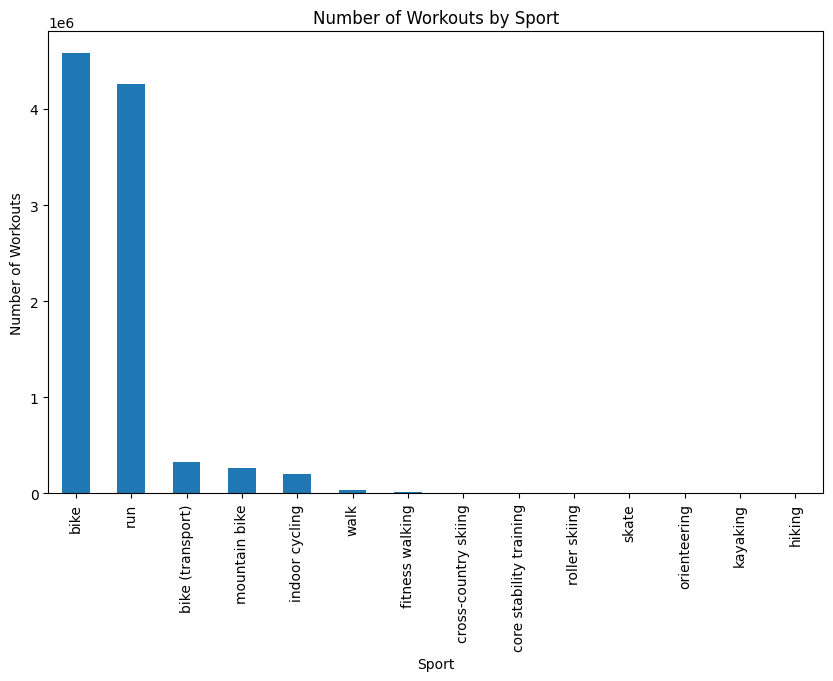

In [24]:
import matplotlib.pyplot as plt

# TODO: Create a bar chart that visualizes the number of workouts associated with each sport.

# Count the number of workouts for each sport
sport_counts = endomondo_expanded_df['sport'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
sport_counts.plot(kind='bar')

# Add titles and labels
plt.title('Number of Workouts by Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Workouts')
plt.show()


#### 2.3 Heatmap Visualization
Use pallete name `viridis` for the visualization


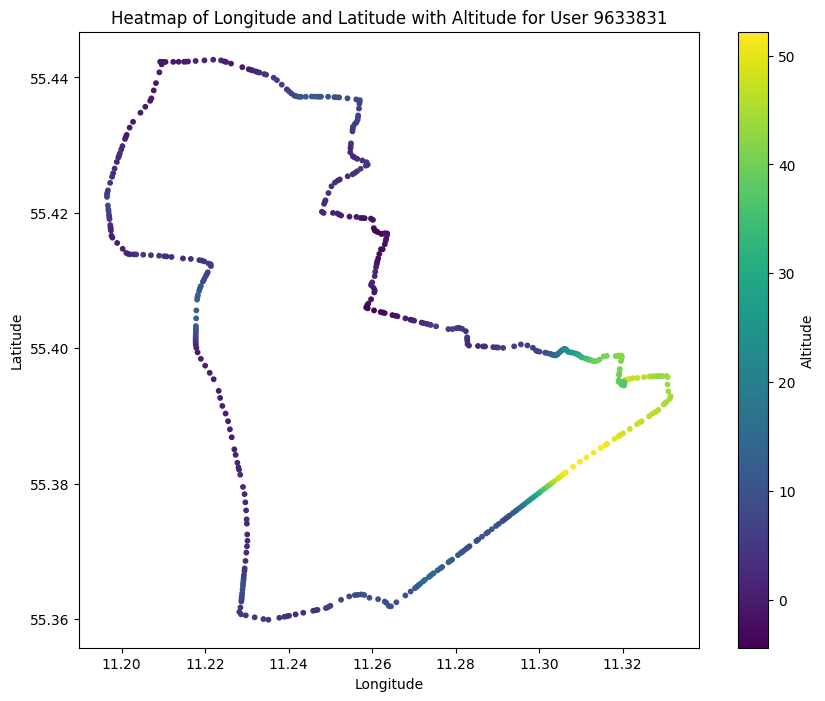

In [26]:
USER_ID = 9633831
PALLETE_NAME = "viridis"
# TODO: Plot Heatmap with longitude and latitude on the x and y axes, respectively, and color the points based on the Altitude.
import seaborn as sns

# Filter the data for the specific user
user_data = endomondo_expanded_df[endomondo_expanded_df['id'] == USER_ID]
plt.figure(figsize=(10, 8))
# Use scatter plot to show longitude and latitude, with altitude as the color
scatter = plt.scatter(user_data['longitude'], user_data['latitude'],
                      c=user_data['altitude'], cmap=PALLETE_NAME, s=10)
plt.colorbar(scatter, label='Altitude')
plt.title(f"Heatmap of Longitude and Latitude with Altitude for User {USER_ID}")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()




- Next use a different pallet `magma`

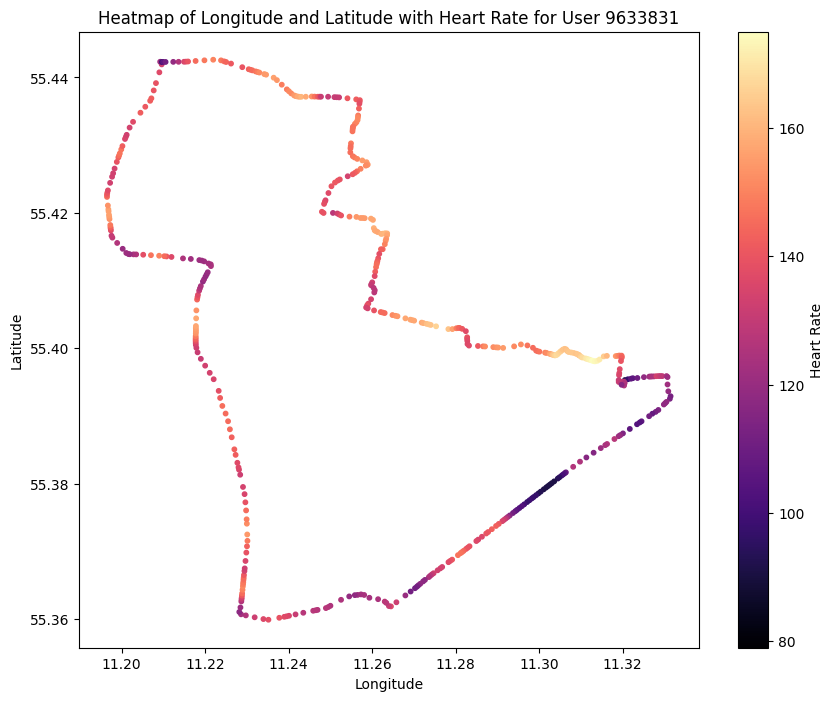

In [28]:
USER_ID = 9633831
PALLETE_NAME = "magma"

# TODO: Plot Heatmap with longitude and latitude on the x and y axes, respectively, and color the points based on the Heart Rate.
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the specific user
user_data = endomondo_expanded_df[endomondo_expanded_df['id'] == USER_ID]
plt.figure(figsize=(10, 8))

# Use scatter plot to show longitude and latitude, with heart_rate as the color
scatter = plt.scatter(user_data['longitude'], user_data['latitude'],
                      c=user_data['heart_rate'], cmap=PALLETE_NAME, s=10)

# Add color bar for heart rate
plt.colorbar(scatter, label='Heart Rate')

# Add labels and title
plt.title(f"Heatmap of Longitude and Latitude with Heart Rate for User {USER_ID}")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



## STOP! End of Assignment 1
- **Submit Assignment 1 before continuing with Assignment2 and Final Project deliverable**

# IT5100F - Assignment 2
Semester: AY2024/2025 Semester 1

**Instructions**
- Make Sure to keep the variable names as they are

## Team submitting the assignment

|Team member | Name | NUSNet ID (exxxxxxx) | Student number (AxxxxxxxZ) |
|------------|------|----------------------|----------------------------|
| 1 |    Dong Suhong           |     E1326008                 |   A0290555Y                         |
| 2 |   Shi Ruyi            |      E1326003                |    A0290550J                         |
| 3 |      Tan Changjie          |     E1330333                 |      A0291194Y                      |
| 4 |     Zhang Haochen          |      E1326060                 |     A0290607A                       |


### Inheriting the data generated in Assignment 1
endomondo_proper_cleaned_expanded.csv

## Dataset
- Use the dataset generated and stored from the previous assignment


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Supervised Learning - Regression [15 Marks]
**Objective:** Perform supervised learning techniques by building a regression model to predict changes in heart rate based on features extracted from a dataset of user workout records.

#### Task 0: Data Loading

In [7]:
#TODO: Load the data from the previous assignment
file_path = '/content/drive/MyDrive/Colab Notebooks/IT5100F/endomondo_proper_cleaned_expanded.csv'
endomondo_df = pd.read_csv(file_path)

print(endomondo_df.head())

   altitude  heart_rate           id   latitude  longitude    speed sport  \
0      41.6         100  396826535.0  60.173349  24.649770   6.8652  bike   
1      40.6         111  396826535.0  60.173240  24.650143  16.4736  bike   
2      40.6         120  396826535.0  60.172980  24.650911  19.1988  bike   
3      38.4         119  396826535.0  60.172478  24.650669  20.4804  bike   
4      37.0         120  396826535.0  60.171861  24.649145  31.3956  bike   

             timestamp  
0  2014-08-24 16:45:46  
1  2014-08-24 16:45:54  
2  2014-08-24 16:46:05  
3  2014-08-24 16:46:18  
4  2014-08-24 16:46:34  


#### Task 1: Data Preperation and Feature Engineering
- Note: Each User only has one workout session

##### 1.1: Compute Heart Rate Difference

In [8]:
# TODO: Add a new column to the dataframe called `heart_rate_diff` that calculates the difference between the current heart rate and the previous heart rate for each user.
endomondo_df['heart_rate_diff'] = endomondo_df.groupby('id')['heart_rate'].diff()

print(endomondo_df.head())

   altitude  heart_rate           id   latitude  longitude    speed sport  \
0      41.6         100  396826535.0  60.173349  24.649770   6.8652  bike   
1      40.6         111  396826535.0  60.173240  24.650143  16.4736  bike   
2      40.6         120  396826535.0  60.172980  24.650911  19.1988  bike   
3      38.4         119  396826535.0  60.172478  24.650669  20.4804  bike   
4      37.0         120  396826535.0  60.171861  24.649145  31.3956  bike   

             timestamp  heart_rate_diff  
0  2014-08-24 16:45:46              NaN  
1  2014-08-24 16:45:54             11.0  
2  2014-08-24 16:46:05              9.0  
3  2014-08-24 16:46:18             -1.0  
4  2014-08-24 16:46:34              1.0  


##### 1.2: Compute Speed Difference

In [9]:
# TODO: Add a new column to the dataframe called `speed_diff` that calculates the difference in speed between the current and previous row for each user.
endomondo_df['speed_diff'] = endomondo_df.groupby('id')['speed'].diff()

print(endomondo_df.head())

   altitude  heart_rate           id   latitude  longitude    speed sport  \
0      41.6         100  396826535.0  60.173349  24.649770   6.8652  bike   
1      40.6         111  396826535.0  60.173240  24.650143  16.4736  bike   
2      40.6         120  396826535.0  60.172980  24.650911  19.1988  bike   
3      38.4         119  396826535.0  60.172478  24.650669  20.4804  bike   
4      37.0         120  396826535.0  60.171861  24.649145  31.3956  bike   

             timestamp  heart_rate_diff  speed_diff  
0  2014-08-24 16:45:46              NaN         NaN  
1  2014-08-24 16:45:54             11.0      9.6084  
2  2014-08-24 16:46:05              9.0      2.7252  
3  2014-08-24 16:46:18             -1.0      1.2816  
4  2014-08-24 16:46:34              1.0     10.9152  


##### 1.3: Compute Altitude Difference

In [10]:
# TODO: Add a new column to the dataframe called `altitude_diff` that calculates the difference in altitude between the current and previous row for each user.
endomondo_df['altitude_diff'] = endomondo_df.groupby('id')['altitude'].diff()

print(endomondo_df.head())

   altitude  heart_rate           id   latitude  longitude    speed sport  \
0      41.6         100  396826535.0  60.173349  24.649770   6.8652  bike   
1      40.6         111  396826535.0  60.173240  24.650143  16.4736  bike   
2      40.6         120  396826535.0  60.172980  24.650911  19.1988  bike   
3      38.4         119  396826535.0  60.172478  24.650669  20.4804  bike   
4      37.0         120  396826535.0  60.171861  24.649145  31.3956  bike   

             timestamp  heart_rate_diff  speed_diff  altitude_diff  
0  2014-08-24 16:45:46              NaN         NaN            NaN  
1  2014-08-24 16:45:54             11.0      9.6084           -1.0  
2  2014-08-24 16:46:05              9.0      2.7252            0.0  
3  2014-08-24 16:46:18             -1.0      1.2816           -2.2  
4  2014-08-24 16:46:34              1.0     10.9152           -1.4  


##### 1.4: Compute Time Elapsed

In [11]:
# TODO: Add a new column to the dataframe called `time_elapsed` which is the difference between the start and current time in seconds
endomondo_df['timestamp'] = pd.to_datetime(endomondo_df['timestamp'])
endomondo_df['time_elapsed'] = endomondo_df.groupby('id')['timestamp'].transform(lambda x: x - x.min())

print(endomondo_df.head())

   altitude  heart_rate           id   latitude  longitude    speed sport  \
0      41.6         100  396826535.0  60.173349  24.649770   6.8652  bike   
1      40.6         111  396826535.0  60.173240  24.650143  16.4736  bike   
2      40.6         120  396826535.0  60.172980  24.650911  19.1988  bike   
3      38.4         119  396826535.0  60.172478  24.650669  20.4804  bike   
4      37.0         120  396826535.0  60.171861  24.649145  31.3956  bike   

            timestamp  heart_rate_diff  speed_diff  altitude_diff  \
0 2014-08-24 16:45:46              NaN         NaN            NaN   
1 2014-08-24 16:45:54             11.0      9.6084           -1.0   
2 2014-08-24 16:46:05              9.0      2.7252            0.0   
3 2014-08-24 16:46:18             -1.0      1.2816           -2.2   
4 2014-08-24 16:46:34              1.0     10.9152           -1.4   

     time_elapsed  
0 0 days 00:00:00  
1 0 days 00:00:08  
2 0 days 00:00:19  
3 0 days 00:00:32  
4 0 days 00:00:48  


##### 1.5: Remove NaN values
As we calculate the differences for heart rate speed and altitude, the first record for each user will not have a previous record to compare against resulting in `NaN` values. Use an appropriate method to handle these `Nan` values, ensuring a complete and consistent dataset for modeling.

In [12]:
# Clean the data by removing rows with missing values
endomondo_df = endomondo_df.dropna()

print(endomondo_df.head())

   altitude  heart_rate           id   latitude  longitude    speed sport  \
1      40.6         111  396826535.0  60.173240  24.650143  16.4736  bike   
2      40.6         120  396826535.0  60.172980  24.650911  19.1988  bike   
3      38.4         119  396826535.0  60.172478  24.650669  20.4804  bike   
4      37.0         120  396826535.0  60.171861  24.649145  31.3956  bike   
5      34.0         116  396826535.0  60.171545  24.648350  31.8096  bike   

            timestamp  heart_rate_diff  speed_diff  altitude_diff  \
1 2014-08-24 16:45:54             11.0      9.6084           -1.0   
2 2014-08-24 16:46:05              9.0      2.7252            0.0   
3 2014-08-24 16:46:18             -1.0      1.2816           -2.2   
4 2014-08-24 16:46:34              1.0     10.9152           -1.4   
5 2014-08-24 16:46:40             -4.0      0.4140           -3.0   

     time_elapsed  
1 0 days 00:00:08  
2 0 days 00:00:19  
3 0 days 00:00:32  
4 0 days 00:00:48  
5 0 days 00:00:54  


In [13]:
print(endomondo_df.shape)

(9676109, 12)


#### Task 2: Model Training and Application

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

##### 2.0: Define the Features and Target Variable
**DO NOT CHANGE. RUN THE CELL BELOW AND USE THESE VALUES DURING SPLITTING**
- Features: 'Speed_diff'
- Target: 'Heart_rate_diff'

In [15]:
X_Features = ['speed_diff'] # Features to use as input for the model
Y_Features = ['heart_rate_diff'] # Features to predict
TEST_SIZE = 0.0001
RANDOM_STATE = 42

##### 2.1: Split the data into training and testing sets

In [16]:
# TODO: Split the data into training and testing sets
# Get features
X = endomondo_df[X_Features]
y = endomondo_df[Y_Features]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Print split dataset size
print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')

Training set size: 9675141
Test set size: 968


##### 2.2: Train a Linear Regression model

In [17]:
# TODO: Train a linear regression model on the training data
# Create linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Print coefficients and intercept of the model
print(f'Model coefficients: {model.coef_}')
print(f'Model intercept: {model.intercept_}')

Model coefficients: [[0.09490635]]
Model intercept: [0.0843423]


##### 2.3: Make predictions on the test set

In [18]:
# TODO: Predict the Changes in heart rate for the test data
y_pred = model.predict(X_test)

print('Predictions on the test set:')
print(y_pred)

Predictions on the test set:
[[ 8.43422975e-02]
 [-1.15999388e+00]
 [ 5.49592906e-02]
 [-2.15731923e-02]
 [ 4.60854781e-01]
 [-1.06305584e-01]
 [ 7.34090856e-02]
 [ 6.89674683e-02]
 [ 6.94210521e-01]
 [ 1.04500407e-01]
 [ 6.69174911e-02]
 [ 2.12124211e-01]
 [ 1.10992001e-01]
 [-1.43982720e-02]
 [ 1.46524940e-01]
 [ 9.11755549e-02]
 [-4.34396160e-02]
 [-1.61313306e-01]
 [ 1.59166466e-01]
 [ 1.78641250e-01]
 [ 4.98343476e-02]
 [ 5.90592451e-02]
 [ 5.56426164e-02]
 [-4.84314712e-05]
 [ 1.65658061e-01]
 [ 3.64505851e-01]
 [-5.24842600e-01]
 [ 7.47757371e-02]
 [ 1.17141933e-01]
 [ 3.34439519e-01]
 [-8.93166610e-03]
 [-3.91935744e-01]
 [ 4.71010446e-02]
 [-6.65607703e-01]
 [-8.13641946e-02]
 [ 1.07618961e+00]
 [-1.38002476e+00]
 [ 3.65872503e-01]
 [ 5.22354097e-01]
 [ 8.09256688e-02]
 [ 1.67708038e-01]
 [ 4.98343476e-02]
 [-1.00522060e+00]
 [ 8.29756460e-02]
 [ 9.04922291e-02]
 [-1.49013443e-01]
 [ 3.45372730e-01]
 [-1.53113397e-01]
 [ 5.35926392e-02]
 [ 6.28175367e-02]
 [ 3.96963824e-01]
 [

#### Task 3: Model Evaluation and Visualization

##### 3.1: Compute the Mean Squared Error (MSE)

In [19]:
# TODO: Calculate the mean squared error of the model on the test data and print it out
# MSE on the test set
mse = mean_squared_error(y_test, y_pred)

print('Mean Squared Error:', mse)

Mean Squared Error: 12.982606208609976


##### 3.2: Calculate the Mean Absolute Error (MAE)

In [20]:
# TODO: Calculate the mean squared error of the model on the test data and print it out
# MAE on the test set
mae = mean_absolute_error(y_test, y_pred)

print('Mean Absolute Error:', mae)

Mean Absolute Error: 2.0911087270830744


##### 3.3: Visualize the predicted vs actual heart rate changes

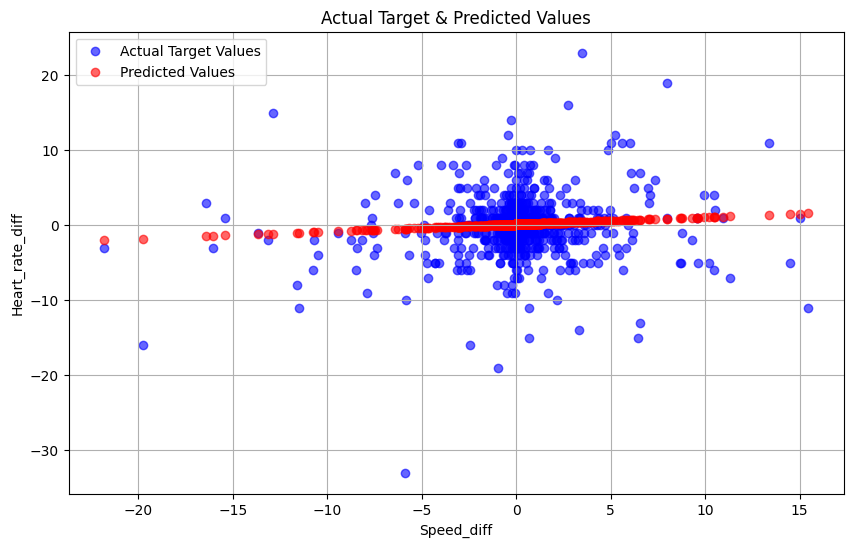

In [21]:
# TODO: Plot scatter plots
plt.figure(figsize=(10, 6))

# Actual target (in color blue) values
plt.scatter(X_test, y_test, color='blue', label='Actual Target Values', alpha=0.6)
# Predicted (in color red) values
plt.scatter(X_test, y_pred, color='red', label='Predicted Values', alpha=0.6)

plt.title('Actual Target & Predicted Values')
plt.xlabel('Speed_diff')
plt.ylabel('Heart_rate_diff')
plt.legend()
plt.grid(True)

plt.show()

#### Task 4: Model Improvement with More Features (Multivariate Regression)

##### 4.0: Define the Features and Target Variable
**DO NOT CHANGE. RUN THE CELL BELOW AND USE THESE VALUES DURING SPLITTING**
- Features: 'Speed_diff', 'Altitude_diff'
- Target: 'Heart_rate_diff'

In [22]:
X_Features = ['speed_diff', 'altitude_diff'] # Features to use as input for the model
Y_Features = ['heart_rate_diff'] # Features to predict
TEST_SIZE = 0.0001
RANDOM_STATE = 42

##### 4.1: Check Correlation between Features

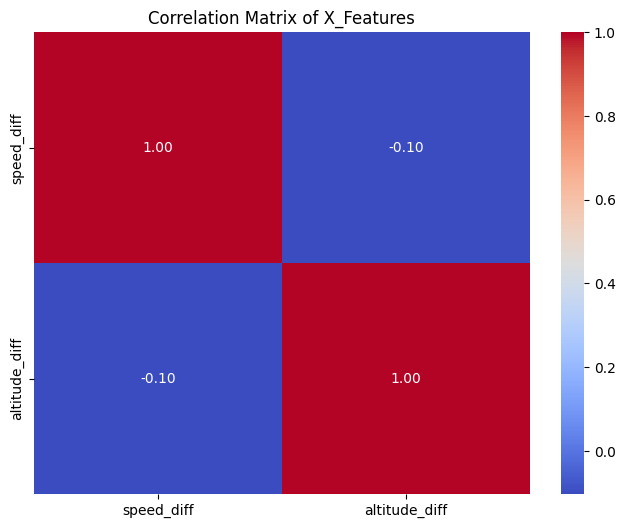

In [23]:
# TODO: Plot a Correlation matrix of the X_Features
correlation_matrix = endomondo_df[X_Features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of X_Features')
plt.show()

##### 4.2: Split the data into training and testing sets

In [24]:
# TODO: Split the data into training and testing data
# Get features
X = endomondo_df[X_Features]
y = endomondo_df[Y_Features]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Print split dataset size
print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')

Training set size: 9675141
Test set size: 968


##### 4.3: Train a Linear Regression model

In [25]:
# TODO: Train a linear regression model on the training data
# Create Multivariate linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Print coefficients and intercept of the model
print(f'Model coefficients: {model.coef_}')
print(f'Model intercept: {model.intercept_}')

Model coefficients: [[0.11247555 0.21428381]]
Model intercept: [0.08436618]


##### 4.4: Make predictions on the test set

In [26]:
# TODO: Predict the Changes in heart rate for the test data
y_pred = model.predict(X_test)

print('Predictions on the test set:')
print(y_pred)

Predictions on the test set:
[[ 8.43661830e-02]
 [-1.39032325e+00]
 [ 6.68699039e-03]
 [-1.69726818e-01]
 [-2.65587241e-02]
 [-1.84431464e-01]
 [-1.43045249e-02]
 [ 6.61451439e-02]
 [ 8.92847593e-01]
 [ 6.53992276e-02]
 [ 6.37156720e-02]
 [ 1.92946501e-01]
 [ 1.15949317e-01]
 [-3.26533794e-02]
 [ 5.86627786e-01]
 [ 4.96076603e-02]
 [-6.70708977e-02]
 [-2.06765531e-01]
 [ 1.73041907e-01]
 [ 1.31039771e+00]
 [-2.56527263e-01]
 [-1.18844341e+00]
 [ 5.03535766e-02]
 [-1.56470762e-02]
 [ 1.80735234e-01]
 [ 4.16394007e-01]
 [-6.80448641e-01]
 [ 7.30286476e-02]
 [ 1.66094495e-01]
 [ 1.28075376e+00]
 [ 5.95387369e-02]
 [-4.80081118e-01]
 [ 4.25941638e-01]
 [-1.74726438e+00]
 [-3.26299939e-01]
 [-8.40155690e-01]
 [-4.51097222e-01]
 [ 5.46583942e-01]
 [ 6.46320104e-01]
 [ 3.37457637e-01]
 [ 2.26021469e-01]
 [ 4.34700730e-02]
 [-2.23546042e+00]
 [-4.58237518e-02]
 [ 9.16545987e-02]
 [-1.92188700e-01]
 [ 3.08005412e-01]
 [-1.97047643e-01]
 [ 5.06734247e-03]
 [ 4.01710827e-01]
 [ 8.83428268e-01]
 [

##### 4.5: Compute the Mean Squared Error (MSE)

In [27]:
# TODO: Calculate the mean squared error of the model on the test data and print it out
# MSE on the test set
mse = mean_squared_error(y_test, y_pred)

print('Mean Squared Error:', mse)

Mean Squared Error: 12.516444902278938


##### 4.6: Compute the Mean Absolute Error (MSE)

In [28]:
# TODO: Calculate the mean absolute error of the model on the test data and print it out
# MAE on the test set
mae = mean_absolute_error(y_test, y_pred)

print('Mean Absolute Error:', mae)

Mean Absolute Error: 2.0462808694143892


##### 4.7: Visualize the changes in heart rate predicted by the model
**NOTE: X_test contains many features, but we are only interested in the 'Speed_diff'. Specifically, we want to visualize the relationship between 'Speed_diff' and the predicted heart rate changes.**

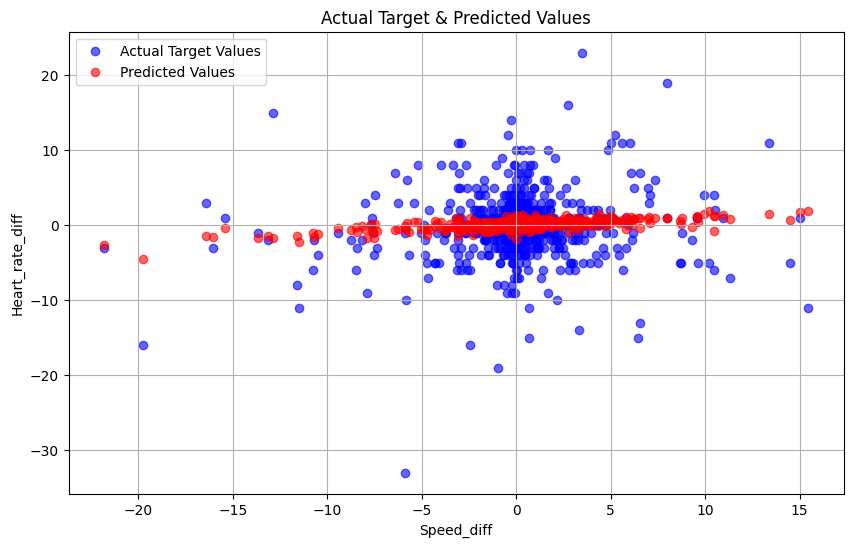

In [29]:
# TODO: Plot scatter plot(s)
# Focus only on the relationship between 'Speed_diff' and the predicted heart rate changes
speed_diff = X_test['speed_diff']
actual_heart_rate_diff = y_test['heart_rate_diff']
predicted_heart_rate_diff = y_pred.flatten()

plt.figure(figsize=(10, 6))

# Actual target (in color blue) values
plt.scatter(speed_diff, actual_heart_rate_diff, color='blue', label='Actual Target Values', alpha=0.6)
# Predicted (in color red) values
plt.scatter(speed_diff, predicted_heart_rate_diff, color='red', label='Predicted Values', alpha=0.6)

plt.title('Actual Target & Predicted Values')
plt.xlabel('Speed_diff')
plt.ylabel('Heart_rate_diff')
plt.legend()
plt.grid(True)

plt.show()

#### Explanation
- In the scatter plot, the red prediction points are roughly distributed along a straight line, which shows that the model captures the strong linear relationship between speed_diff and heart_rate_diff
- Since the actual model takes both altitude_diff and speed_diff into account, and here we only focus on the relationship between speed_diff and predicted heart_rate_diff, the predicted heart_rate_diff is not a simple straight line.

#### Task 5: Model Comparison

##### 5.1: Compare the performance of the models
-	Compare the performance of the simple linear regression model and the multiple linear regression model using MSE , MAE and the scatter plots.
-	Provide reason(s) for why one model performed better than the other.


### Comparison of Model Performance
#### Linear Regression Model
- MSE: 12.9826
- MAE: 2.0911
- Scatter Plot: Model predictions forms a straight line.

#### Multivariate Linear Regression Model
- MSE: 12.5164
- MAE: 2.0463
- Scatter Plot: Model predictions are approximately distributed along a straight line.

### Evaluation of Regrrerssion Models
Multivariate linear regression model performs better than linear regression model for the following reasons:
- **Error Performance:** MSE and MAE are both used to measure the prediction error of the model. The smaller the value, the more accurate the model's prediction and the smaller the error.   
MSE and MAE of multivariate linear regression model are slightly lower than those of linear regression model, indicating that the multivariate linear regression provides more accurate predictions overall.   
- **Scatter Plots:** Compared with linear regression model, multivariate linear regression model not only considers speed_diff, but also other features. It allows the model to better capture the multidimensional factors that affect the target variable, which is more in line with the actual situation and usually brings performance improvement when processing multi-feature data.



# IT5100F - Assignment 3
Semester: AY2024/2025 Semester 1

**Instructions**
- Make Sure to keep the variable names as they are

## Team submitting the assignment

|Team member | Name | NUSNet ID (exxxxxxx) | Student number (AxxxxxxxZ) |
|------------|------|----------------------|----------------------------|
| 1 |    Dong Suhong           |     E1326008                 |   A0290555Y                         |
| 2 |   Shi Ruyi            |      E1326003                |    A0290550J                         |
| 3 |      Tan Changjie          |     E1330333                 |      A0291194Y                      |
| 4 |     Zhang Haochen          |      E1326060                 |     A0290607A                       |


# **Task 1: Unsupervised Learning**

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
tqdm.pandas()

## 0: Data loading

### Load the data from previous assignment 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#TODO: Load the data from the previous assignment 1
file_path = '/content/drive/MyDrive/IT5100F/ASSI3/endomondo_proper_cleaned_expanded.csv'
endomondo_df = pd.read_csv(file_path)

Displaying the initial rows of the dataset allows us to examine the types of features it contains, providing a preliminary understanding of its structure.

In [ ]:
endomondo_df.head()

,altitude,heart_rate,id,latitude,longitude,speed,sport,timestamp
0,41.6,100,396826535.0,60.173349,24.649770,6.8652,bike,2014-08-24 16:45:46
1,40.6,111,396826535.0,60.173240,24.650143,16.4736,bike,2014-08-24 16:45:54
2,40.6,120,396826535.0,60.172980,24.650911,19.1988,bike,2014-08-24 16:46:05
3,38.4,119,396826535.0,60.172478,24.650669,20.4804,bike,2014-08-24 16:46:18
4,37.0,120,396826535.0,60.171861,24.649145,31.3956,bike,2014-08-24 16:46:34


The info() method displays details about the DataFrame, such as the index dtype, columns, non-null counts, and memory usage. It offers a concise summary of the endomondo_df, giving us an overview of its structure.

In [ ]:
endomondo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9695500 entries, 0 to 9695499
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   altitude    float64
 1   heart_rate  int64  
 2   id          float64
 3   latitude    float64
 4   longitude   float64
 5   speed       float64
 6   sport       object 
 7   timestamp   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 591.8+ MB


## 1: Data Preprocessing for Clustering

### 1.1 Filter Data for Specific Sport

We begin by filtering the dataset to include only users engaged in the sport Bike. Before applying the filter, we use the value_counts() method to identify the various sports types and the number of entries associated with each sport in the dataset.

In [ ]:
sports_counts = endomondo_df['sport'].value_counts()
print(sports_counts)


sport
bike                       4579000
run                        4256500
bike (transport)            321500
mountain bike               262000
indoor cycling              201500
walk                         30000
fitness walking              12500
cross-country skiing          8000
core stability training       7000
roller skiing                 6500
skate                         4500
orienteering                  3500
kayaking                      1500
hiking                        1500
Name: count, dtype: int64


The `endomondo_df` dataset contains several sports, including `bike`, `run`, and `bike (transport)`. To filter for entries where the sport is `bike`, we use `==` to generate a boolean sequence, which is then applied to index the DataFrame, returning only rows where the sport is `bike`. The `copy()` method is used to create an independent copy of the filtered DataFrame, ensuring that any modifications made later do not impact the original dataset.

In [ ]:
# Filter the dataset to include only users engaged in the sport "bike"
bike_df = endomondo_df[endomondo_df['sport'] == 'bike'].copy()

Before moving on to the next step, we observe that the data types of the id and timestamp fields are float and str, which are not suitable. We will convert them to int and datetime types, respectively.

In [ ]:
print(type(bike_df.loc[0,'id']))
print(type(bike_df.loc[0,'timestamp']))

<class 'numpy.float64'>
<class 'str'>


In [ ]:
# Convert the 'timestamp' column to datetime format
bike_df['timestamp'] = pd.to_datetime(bike_df['timestamp'])

# Convert the 'id' column to integer type
bike_df['id'] = bike_df['id'].astype(int)

Let's check the type again.

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4579000 entries, 0 to 9666499
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   altitude    float64       
 1   heart_rate  int64         
 2   id          int64         
 3   latitude    float64       
 4   longitude   float64       
 5   speed       float64       
 6   sport       object        
 7   timestamp   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 443.4+ MB


In [ ]:
bike_df.head()

,altitude,heart_rate,id,latitude,longitude,speed,sport,timestamp
0,41.6,100,396826535,60.173349,24.649770,6.8652,bike,2014-08-24 16:45:46
1,40.6,111,396826535,60.173240,24.650143,16.4736,bike,2014-08-24 16:45:54
2,40.6,120,396826535,60.172980,24.650911,19.1988,bike,2014-08-24 16:46:05
3,38.4,119,396826535,60.172478,24.650669,20.4804,bike,2014-08-24 16:46:18
4,37.0,120,396826535,60.171861,24.649145,31.3956,bike,2014-08-24 16:46:34


Even though we removed all the NA values in Assignment 1, we will verify for NA values again to confirm that none are present in the data.

In [ ]:
bike_df.isna().sum().sum()

0


At this stage, we have successfully extracted a subset of the original dataset that includes only users who participated in the sport bike.

### 1.2 Generate Average Speed Dataset

Create a new dataset containing `user_ids` and their average speed (`avg_speed`).

We note that the corresponding field for `user_ids` is `id`. Using the `groupby()` method, we group the entries by `id`. Then, we select the `speed` column to isolate the speed values and apply the `mean()` method to calculate the average speed. This produces a DataFrame with `id` as the index and the average speed as the values. Finally, we use `reset_index()` to turn `id` into a separate column and rename the speed column to `avg_speed`.

In [ ]:
# Generate a new dataset containing user_ids and their average speed (avg_speed)

avg_speed_df = bike_df.groupby('id')['speed'].mean().reset_index()
avg_speed_df = avg_speed_df.rename(columns={'speed': 'avg_speed'})
print(len(avg_speed_df))
avg_speed_df.head()

9158


,id,avg_speed
0,9633831,29.879453
1,10544802,29.825676
2,11426022,25.096514
3,11639926,24.416834
4,11908018,30.805798


### 1.3 Compute Total Workout Time

Create a new dataset with `user_ids` and their total workout time (`workout_time`), computed as the difference in seconds between the minimum and maximum timestamp for each user.

First, we group the DataFrame by `id` and aggregate the timestamp values using the `agg()` function to calculate both the minimum and maximum timestamps for each user. We then use `reset_index()` to convert the grouped data into a flat DataFrame with a new index.

Next, we determine the workout duration by finding the difference between the maximum and minimum timestamps for each user, converting this difference into seconds with `dt.total_seconds()`. The result is stored in a new column named `workout_time`.

Finally, we keep only the `id` and `workout_time` columns, representing the total workout duration for each user.

In [ ]:
# Generate a new dataset with user_ids and their total workout time (workout_time),
# computed as the difference between the minimum and maximum timestamps in seconds for each user.

# Group by user ID and compute the total workout time

workout_time_df = bike_df.groupby('id')['timestamp'].agg(['min', 'max']).reset_index()
workout_time_df['workout_time'] = (workout_time_df['max'] - workout_time_df['min']).dt.total_seconds()
workout_time_df = workout_time_df[['id', 'workout_time']]

workout_time_df.head()

,id,workout_time
0,9633831,4900.0
1,10544802,4608.0
2,11426022,7698.0
3,11639926,8880.0
4,11908018,11046.0


### 1.4 Compute Total Distance Covered

Create a new dataset with `user_ids` and the total distance (`total_distance`) covered by each user.

To calculate the total distance for each user, we use the formula: `distance = avg_speed * workout_time`. First, we merge the two previous DataFrames, then we multiply the `avg_speed` column by the `workout_time` column to obtain the `total_distance`.

In [ ]:
# Generate a new dataset with user_ids and the total distance (`total_distance`) covered by each user.
total_distance_df = pd.merge(workout_time_df, avg_speed_df, on='id')
total_distance_df['total_distance'] = total_distance_df['avg_speed'] * total_distance_df['workout_time']
total_distance_df = total_distance_df[['id', 'total_distance']]
total_distance_df.head()

,id,total_distance
0,9633831,146409.318720
1,10544802,137436.715008
2,11426022,193192.967851
3,11639926,216821.489472
4,11908018,340280.840290


### 1.5 Merge Processed Data

> Add blockquote



Merge all the above datasets into a single DataFrame called `user_merged_df`.  
To merge all the DataFrames, we set `id` as the index and use the `pd.concat` function to concatenate the three DataFrames together.

In [ ]:
# Combine all the above datasets into a single DataFrame named `user_merged_df`.

avg_speed_df.set_index("id", inplace=True)
total_distance_df.set_index("id", inplace=True)
workout_time_df.set_index("id", inplace=True)

user_merged_df = pd.concat(
    [avg_speed_df, workout_time_df, total_distance_df], axis=1
).reset_index()

user_merged_df.head()

,id,avg_speed,workout_time,total_distance
0,9633831,29.879453,4900.0,146409.318720
1,10544802,29.825676,4608.0,137436.715008
2,11426022,25.096514,7698.0,193192.967851
3,11639926,24.416834,8880.0,216821.489472
4,11908018,30.805798,11046.0,340280.840290


## 2: Determine the Optimal Number of Clusters

### 2.1 Run K-Means for Different Cluster Numbers

Use `user_merged_df` to perform k-means clustering with cluster numbers ranging from 2 to 11.

First, we drop the `id` field, as it should not be included as a feature for clustering. We then apply `StandardScaler` to standardize the data by removing the mean and scaling it to unit variance. This is essential because k-means clustering relies on Euclidean distance, and without scaling, features with larger ranges could disproportionately affect the distance calculations.

Next, we run k-means clustering with cluster counts from 2 to 11 and collect the inertia values. We set `random_state` to ensure the results are reproducible.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = user_merged_df.drop(columns=["id"])
scaler = StandardScaler()
X = scaler.fit_transform(X)

inertia = []
cluster_range = range(2, 12)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

print(inertia)

[15168.299598080355, 10681.86194367218, 8863.346142508115, 7083.415034261779, 5887.5689848730335, 5189.091420621941, 4757.930468282854, 4243.862983974921, 3919.4003948357736, 3601.3000470406323]


### 2.2 Elbow Method for Optimal Clusters

Plot the inertia (y-axis) against the number of clusters (x-axis) to determine the optimal number of clusters using the Elbow Method.

The Elbow Method aids in selecting the appropriate number of clusters by pinpointing where the inertia begins to decrease at a slower rate.

In our graph, the inertia begins to decrease more gradually when the number of clusters reaches 6. Therefore, we conclude that the optimal number of clusters is 6.

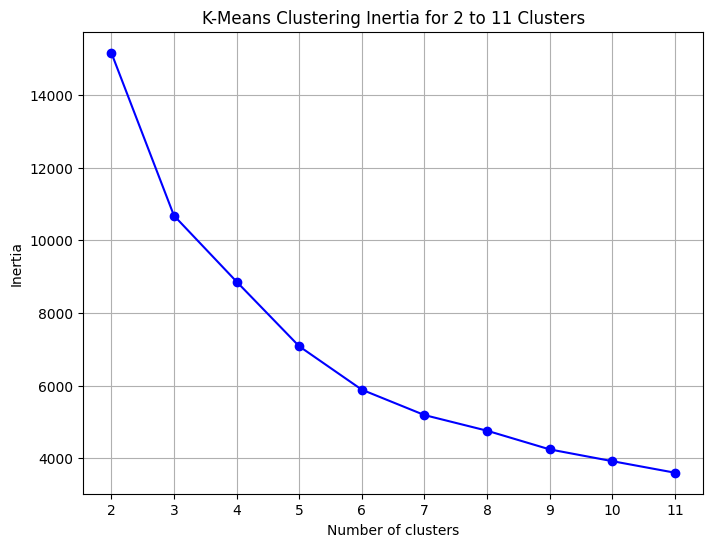

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='-', color='b')
plt.title('K-Means Clustering Inertia for 2 to 11 Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [ ]:
best_cluster_number = 6

## 3: Cluster Analysis and Visualization

### 3.1 Identify the Cluster Number for Each User

Create a k-means model using the features from `user_merged_df` and the optimal number of clusters identified in Task 2.

Add a new column named `cluster` to the DataFrame that assigns the corresponding cluster number to each user.

In [ ]:
# Build a k-means model using the features from `user_merged_df` and the optimal number of clusters identified in Task 2.
kmeans = KMeans(n_clusters=best_cluster_number, random_state=42)
kmeans.fit(X)

# Add a new column called `cluster` to the DataFrame, which indicates the cluster number assigned to each user.
user_merged_df['cluster'] = kmeans.labels_
user_merged_df.head()


,id,avg_speed,workout_time,total_distance,cluster
0,9633831,29.879453,4900.0,146409.318720,1
1,10544802,29.825676,4608.0,137436.715008,1
2,11426022,25.096514,7698.0,193192.967851,4
3,11639926,24.416834,8880.0,216821.489472,4
4,11908018,30.805798,11046.0,340280.840290,0


### 3.2 Visualize the Clusters

Visualize the clusters using a scatter plot.

Since the dataset contains three features, we use a 3D scatter plot to display the results.

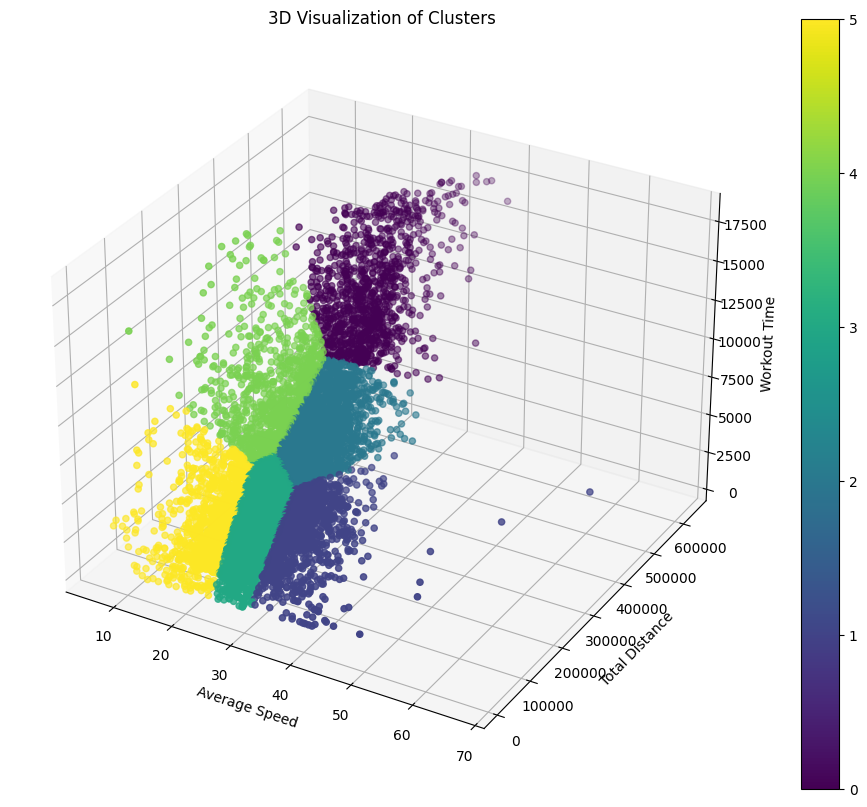

In [ ]:
# Visualize the clusters using a 3D scatter plot.
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(user_merged_df['avg_speed'],
                     user_merged_df['total_distance'],
                     user_merged_df['workout_time'],
                     c=user_merged_df['cluster'],
                     cmap='viridis')

ax.set_xlabel('Average Speed')
ax.set_ylabel('Total Distance')
ax.set_zlabel('Workout Time')
ax.set_title('3D Visualization of Clusters')

plt.colorbar(scatter)
plt.show()

To enhance visualization, we first apply Principal Component Analysis (PCA) to reduce the dimensionality of the features from 3 to 2. This transformation projects the data into two principal components, enabling us to visualize it using a 2D scatter plot.

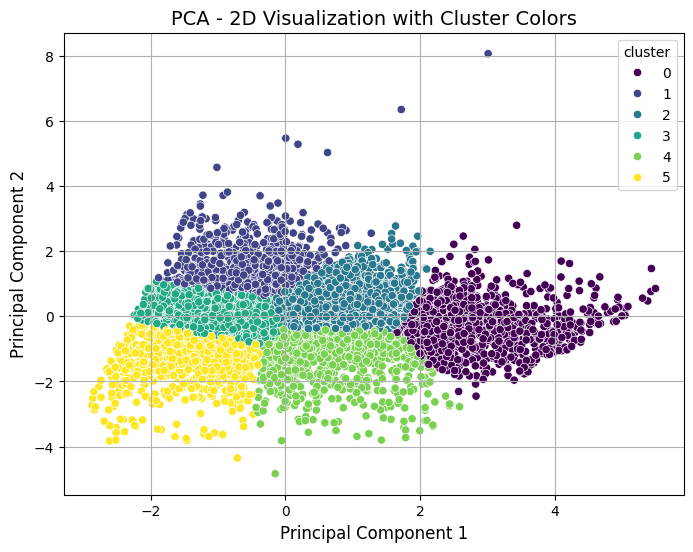

In [ ]:
# Apply PCA to reduce the dimensionality from 3 to 2pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = user_merged_df['cluster'].values

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', palette='viridis', data=pca_df)
plt.title('PCA - 2D Visualization with Cluster Colors', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.show()

Next, we use the t-SNE method for dimensionality reduction. In this approach, we reduce the features to 2 components to visualize them using a 2D scatter plot.

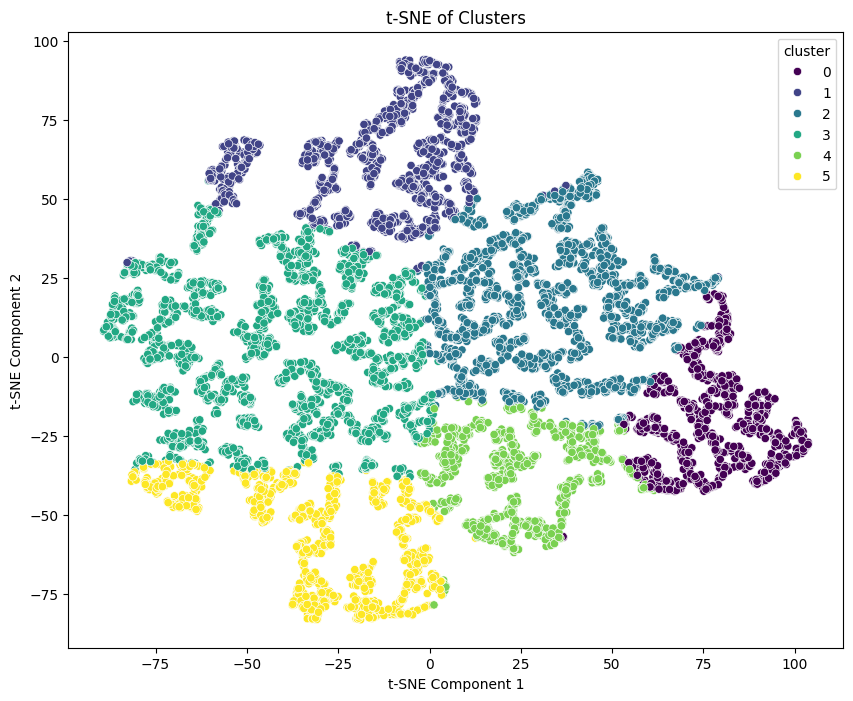

In [ ]:
# Apply t-SNE for dimensionality reductiontsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X)
user_merged_df['tsne1'] = tsne_result[:, 0]
user_merged_df['tsne2'] = tsne_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=user_merged_df, palette='viridis')
plt.title('t-SNE of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### 3.3 Identify Similar Users

Determine which cluster the user with ID: 377398220 belongs to.

Identify similar users (workout buddies) within that cluster to make recommendations based on their shared workout patterns.

To find the user's cluster, we filter the `id` field using the `==` operator for the target user ID.

Once we identify the user's cluster, we retrieve other users from the same cluster (excluding the target user with ID 377398220). We then calculate the similarity score using the Euclidean distance between the target user and each user in the cluster, based on relevant features (`avg_speed` and `total_distance`). We sort the users by this distance to identify the top-K users who are most similar to the target user.

In [ ]:
target_user_id = 377398220
target_user = user_merged_df[user_merged_df['id'] == target_user_id].iloc[0]
target_user_cluster = target_user['cluster']

similar_users = user_merged_df[
    (user_merged_df['cluster'] == target_user_cluster) &
    (user_merged_df['id'] != target_user_id)
].copy()

target_user_features = target_user[['avg_speed', 'total_distance']].values

similar_users['similarity'] = similar_users.apply(
    lambda row: euclidean(row[['avg_speed', 'total_distance']], target_user_features),
    axis=1
)

similar_users = similar_users.sort_values('similarity')

print(f"Target User (ID: {target_user_id}):")
print(f"Cluster: {target_user_cluster}")
print(f"Average Speed: {target_user['avg_speed']:.2f} km/h")
print(f"Total Distance: {target_user['total_distance']:.2f} km")
print(f"Workout Time: {target_user['workout_time']:.2f} seconds")
print("\nTop 5 similar users:")
for _, user in similar_users.head().iterrows():
    print(f"User ID: {user['id']}")
    print(f"  Average Speed: {user['avg_speed']:.2f} km/h")
    print(f"  Total Distance: {user['total_distance']:.2f} km")
    print(f"  Workout Time: {user['workout_time']:.2f} seconds")
    print(f"  Similarity Score: {user['similarity']:.2f}")
    print()

cluster_avg = user_merged_df[user_merged_df['cluster'] == target_user_cluster].mean()
print(f"Cluster {target_user_cluster} Averages:")
print(f"Average Speed: {cluster_avg['avg_speed']:.2f} km/h")
print(f"Total Distance: {cluster_avg['total_distance']:.2f} km")
print(f"Workout Time: {cluster_avg['workout_time']:.2f} seconds")

Target User (ID: 377398220):
Cluster: 3.0
Average Speed: 28.78 km/h
Total Distance: 108079.47 km
Workout Time: 3756.00 seconds

Top 5 similar users:
User ID: 248753701.0
  Average Speed: 27.30 km/h
  Total Distance: 108081.08 km
  Workout Time: 3959.00 seconds
  Similarity Score: 2.18

User ID: 67898654.0
  Average Speed: 24.47 km/h
  Total Distance: 108072.49 km
  Workout Time: 4416.00 seconds
  Similarity Score: 8.20

User ID: 224376777.0
  Average Speed: 27.57 km/h
  Total Distance: 108110.86 km
  Workout Time: 3922.00 seconds
  Similarity Score: 31.40

User ID: 413370913.0
  Average Speed: 25.91 km/h
  Total Distance: 108132.76 km
  Workout Time: 4173.00 seconds
  Similarity Score: 53.37

User ID: 301826582.0
  Average Speed: 23.18 km/h
  Total Distance: 108006.47 km
  Workout Time: 4659.00 seconds
  Similarity Score: 73.21

Cluster 3.0 Averages:
Average Speed: 26.39 km/h
Total Distance: 99962.53 km
Workout Time: 3805.44 seconds


# IT5100F - Assignment 3
Semester: AY2024/2025 Semester 1

**Instructions**
- Make Sure to keep the variable names as they are

## Team submitting the assignment

|Team member | Name | NUSNet ID (exxxxxxx) | Student number (AxxxxxxxZ) |
|------------|------|----------------------|----------------------------|
| 1 |    Dong Suhong           |     E1326008                 |   A0290555Y                         |
| 2 |   Shi Ruyi            |      E1326003                |    A0290550J                         |
| 3 |      Tan Changjie          |     E1330333                 |      A0291194Y                      |
| 4 |     Zhang Haochen          |      E1326060                 |     A0290607A                       |


## Free-form Exploration
**Objective:** In this part, you must define one (or more) data analysis tasks that best represent your understanding of the dataset and the affordances provided by the dataset. Note: You cannot repeat any of the analyses from the earlier assignments/unsupervised learning above. However, you can expand on the tasks. For example, you could do additional visualizations, which may help explain the data or models better; you could try different analysis tasks, such as classification.

## Two Analysis Tasks
1. Workouts Differentiation by Sport
2. Workout Performance Evaluation for Runners

Base on Random Forest

## 1. Workouts Differentiation by Sport
The objective of this analysis task is to classify workout sessions into two distinct sports categories: run and bike. We utilize a machine learning model, specifically a Random Forest classifier, to differentiate between these sports based on key workout metrics such as speed, heart rate, and altitude.

##### **Dataset**:   
- We will use the dataset `endomondo_proper_cleaned_expanded.csv` generated in assignment 1, which provides relevant features for this task.

##### **Feature Engineering**:
Several advanced features are computed to aid in the classification
- **Total Time** (`total_time`):    
Total workout duration in seconds.
- **Average Latitude and Longitude** (`avg_latitude`, `avg_longitude`):    
Indicate geographic location of the workout.
- **Average Altitude** (`avg_altitude`):   
Reflects the elevation level during the workout.
- **Average Heart Rate** (`avg_heart_rate`):   
Assesses average cardiovascular load.
- **Average Speed** (`avg_speed`):   
Indicate workout intensity.

##### **Classification**:
- The Random Forest classifier is used to predict whether a session is a run or a bike ride.

##### **Standardization**:
- Although tree-based models like Random Forest are less sensitive to feature scaling, it's good practice to standardize or normalize continuous features like speed, heart rate, and altitude to improve model interpretability and potentially enhance performance.

##### **Model Selection**:
- In this task, we are working with data that includes multiple complex features (speed, heart rate, altitude, etc.) for classification. Therefore, Random Forest is more suitable than a single decision tree with better resistance to overfitting, stability and analysis ability.

##### **Model Evaluation**:
- The performance of the Random Forest model is evaluated using various metrics:
 - Accuracy
 - Confusion Matrix
 - Precision, Recall, and F1-score
 - Feature Importance


This model offers an efficient way to automatically classify workout sessions as either running or biking, based on the provided workout data, and offers insights into which features are most important for classification.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

### Random Forest

#### Task 0: Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the data from the previous assignment
file_path = '/content/drive/MyDrive/Colab Notebooks/IT5100F/endomondo_proper_cleaned_expanded.csv'
endomondo_df = pd.read_csv(file_path)
print(endomondo_df.shape)

endomondo_df.head()

(9695500, 8)


,altitude,heart_rate,id,latitude,longitude,speed,sport,timestamp
0,41.6,100,396826535.0,60.173349,24.649770,6.8652,bike,2014-08-24 16:45:46
1,40.6,111,396826535.0,60.173240,24.650143,16.4736,bike,2014-08-24 16:45:54
2,40.6,120,396826535.0,60.172980,24.650911,19.1988,bike,2014-08-24 16:46:05
3,38.4,119,396826535.0,60.172478,24.650669,20.4804,bike,2014-08-24 16:46:18
4,37.0,120,396826535.0,60.171861,24.649145,31.3956,bike,2014-08-24 16:46:34


#### Task 1: Data Preperation and Feature Engineering
- Note: Each User only has one workout session

##### 1.1: Plot Workouts by Sport

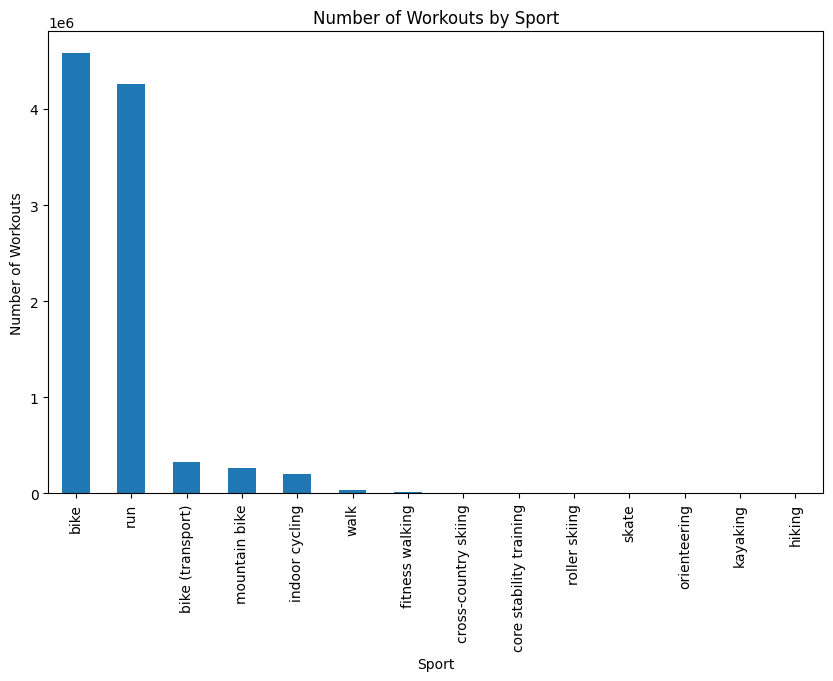

In [4]:
# Create a bar chart that visualizes the number of workouts associated with each sport.
# Count the number of workouts for each sport
sport_counts = endomondo_df['sport'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
sport_counts.plot(kind='bar')

# Add titles and labels
plt.title('Number of Workouts by Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Workouts')
plt.show()

##### 1.2: Filter Two Main Workout Types: Run and Bike

In [5]:
# Filter workout records for run and bike
endomondo_df = endomondo_df[endomondo_df['sport'].isin(['run', 'bike'])]
print(endomondo_df.shape)

endomondo_df.head()

(8835500, 8)


,altitude,heart_rate,id,latitude,longitude,speed,sport,timestamp
0,41.6,100,396826535.0,60.173349,24.649770,6.8652,bike,2014-08-24 16:45:46
1,40.6,111,396826535.0,60.173240,24.650143,16.4736,bike,2014-08-24 16:45:54
2,40.6,120,396826535.0,60.172980,24.650911,19.1988,bike,2014-08-24 16:46:05
3,38.4,119,396826535.0,60.172478,24.650669,20.4804,bike,2014-08-24 16:46:18
4,37.0,120,396826535.0,60.171861,24.649145,31.3956,bike,2014-08-24 16:46:34


##### 1.3: Compute Average Features

In [7]:
# Compute new features and generate new dataframe
endomondo_df['timestamp'] = pd.to_datetime(endomondo_df['timestamp'])

processed_df = endomondo_df.groupby('id').agg(
    avg_latitude=('latitude', 'mean'),  # Average Latitude
    avg_longitude=('longitude', 'mean'),  # Average Longitude
    avg_altitude=('altitude', 'mean'),  # Average Altitude
    avg_heart_rate=('heart_rate', 'mean'),  # Average Heart Rate
    avg_speed=('speed', 'mean'),  # Average Speed
    total_time=('timestamp', lambda x: (pd.to_datetime(x).max() - pd.to_datetime(x).min()).total_seconds()),  # Total Time
    sport=('sport', 'first')  # Fit Sport Type
).reset_index()

processed_df.head()

,id,avg_latitude,avg_longitude,avg_altitude,avg_heart_rate,avg_speed,total_time,sport
0,9633831.0,55.401869,11.261268,12.5516,137.402,29.879453,4900.0,bike
1,10544802.0,55.378049,11.269396,16.9572,136.644,29.825676,4608.0,bike
2,11426022.0,59.084909,10.144285,36.7208,154.328,25.096514,7698.0,bike
3,11639926.0,51.665524,0.392160,14.8336,145.996,24.416834,8880.0,bike
4,11908018.0,55.389810,11.424099,41.7756,139.628,30.805798,11046.0,bike


#### Task 2: Model Training and Application

##### 2.0: Define the Features and Label

In [8]:
# Extract required features and label
X = processed_df[['avg_latitude', 'avg_longitude', 'avg_altitude', 'avg_heart_rate', 'avg_speed', 'total_time']]
# Encode
y = processed_df['sport'].map({'run': 0, 'bike': 1})

##### 2.1: Split the data into training and testing sets

In [9]:
# Split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Print split dataset size
print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')

Training set size: 15020
Test set size: 2651


##### 2.2: Feature Standardization

In [10]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 2.3: Train a Random Forest Model

In [11]:
# Initialize the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

##### 2.3: Make predictions on the test set

In [12]:
# Predict the workout performance
y_pred = rf_model.predict(X_test_scaled)

#### Task 3: Model Evaluation and Visualization

##### 3.1: Generate Classification Report

In [13]:
# Output classification report
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1278
           1       1.00      0.99      0.99      1373

    accuracy                           0.99      2651
   macro avg       0.99      0.99      0.99      2651
weighted avg       0.99      0.99      0.99      2651

Accuracy: 0.99245567710298


##### 3.2: Plot Confusion Matrix

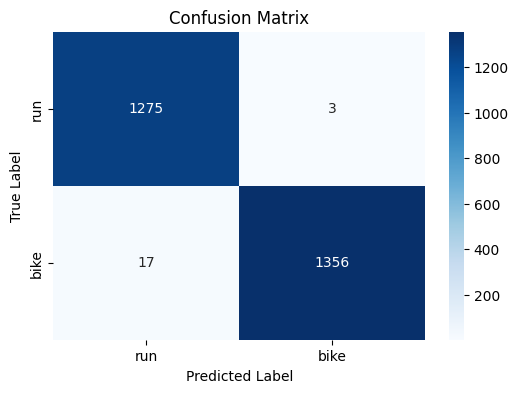

In [14]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['run', 'bike'], yticklabels=['run', 'bike'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

##### 3.2: Compute Precision, Recall, F1-score

In [15]:
# Calculate precision, recall and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Precision: 1.00
Recall: 0.99
F1-score: 0.99


##### 3.3: Check Feature Importance

In [16]:
# Check feature importance
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]

print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i+1}. feature {X.columns[indices[i]]} ({importances[indices[i]]:.4f})")

Feature ranking:
1. feature avg_speed (0.7753)
2. feature total_time (0.0744)
3. feature avg_heart_rate (0.0724)
4. feature avg_longitude (0.0501)
5. feature avg_latitude (0.0209)
6. feature avg_altitude (0.0069)


##### 3.3: Visualize Feature Importance

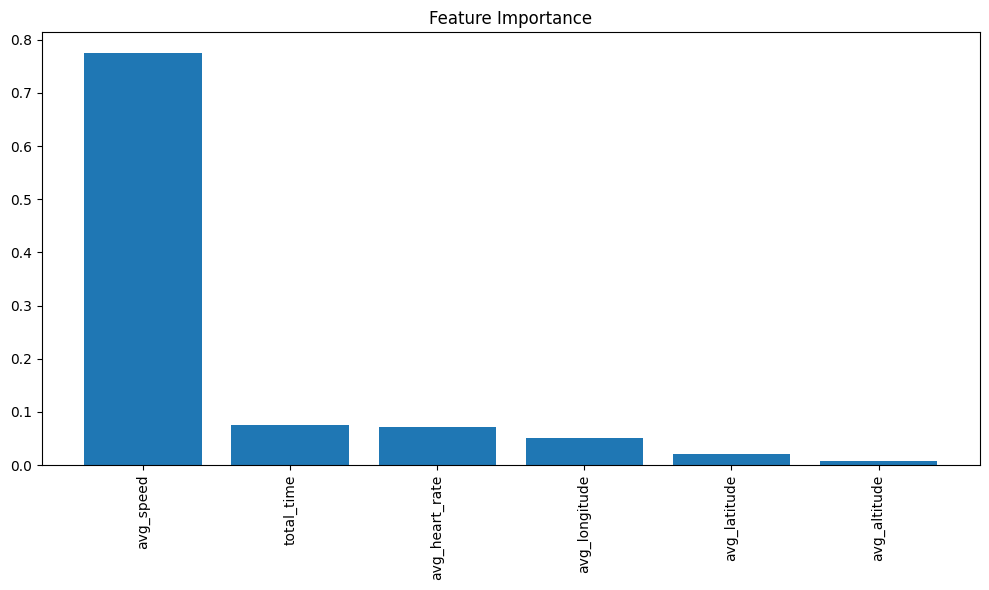

In [17]:
# Plot feature importance bar chart
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

#### Model Performance Evaluation:
The model performed exceptionally well, achieving an overall accuracy of 99.2%. Both precision and recall are nearly perfect, with precision at 1.00 and recall at 0.99, indicating that the model is highly accurate in distinguishing between the two sports categories (run and bike). The F1-score, which balances precision and recall, is also very high at 0.99, reflecting the model’s strong predictive capabilities across both classes.

The confusion matrix shows minimal misclassification between the two categories, with class 0 (run) and class 1 (bike) both receiving very high scores in terms of recall and precision, suggesting that the model correctly identifies almost all instances of both sports types.

Feature importance analysis reveals that average speed is by far the most influential factor in predicting the type of sport, followed by total time and average heart rate. Geographic factors such as longitude and latitude have less influence, while altitude plays the smallest role in the classification.

Overall, the model's performance is robust, with highly reliable predictions for the sport type based on the given features.


***
***

## 2. Workout Performance Evaluation for Runners
The objective of this analysis task is to evaluate and predict the performance of individual workout sessions for users based on a machine learning model. Specifically, we aim to classify each workout session into one of three performance levels: **Excellent**, **Satisfactory**, and **Needs Improvement**. These levels are mainly based on the the **average speed to heart rate ratio**, which is a powerful indicator of how efficiently the user performs: a higher ratio signifies better performance, as it implies maintaining higher speeds with a lower heart rate during the workout session.

##### **Dataset**:   
- We will use the dataset `endomondo_proper_cleaned_expanded.csv` generated in assignment 1, which provides relevant features for this task.

##### **Filter**:
- In the original data, there are two main workout types: `bike` and `run`. Here we focus only on the performance evaluation of **run**.

##### **Data Preprocessing**:
More advanced features are needed to specifically evaluate the workout performance
- **Total Time** (`total_time`):    
Total workout duration in seconds.
- **Maximum Altitude Difference** (`max_altitude_diff`):    
Indicates elevation changes.
- **Average Altitude** (`avg_altitude`):   
Assesses the altitude of the run.
- **Maximum Heart Rate** (`max_heart_rate`):   
Indicates maximum cardiovascular load during high-intensity efforts.
- **Average Heart Rate** (`avg_heart_rate`):   
Assesses average cardiovascular load.
- **Average Speed** (`avg_speed`):   
Directly reflects average running speed.
- **Maximum Speed** (`max_speed`):   
Indicates maximum speed during workout.
- **Maximum Speed  Difference** (`max_speed_diff`):   
Indicates speed change.
- **Average Speed/Heart Rate Ratio** (`avg_SHR_ratio`):   
Serves as a standard metric for performance evaluation.

##### **Classification**:
- Performance levels are categorized based on the quantiles of `avg_SHR_ratio`, dividing the sessions into three groups: "Needs Improvement" (lower quartile), "Satisfactory" (middle), and "Excellent" (upper quartile).
- Encode the performance categories as numeric values (1, 2, 3). Other types of encodings (e.g., one-hot encoding) could also be considered depending on the model requirements.

##### **Model Selection**:
- In this task, we are working with data that includes multiple complex features (speed, heart rate, altitude, etc.) for classification. Therefore, Random Forest is more suitable than a single decision tree with better resistance to overfitting, stability and analysis ability.

##### **Model Evaluation**:
- To evaluate the performance of the Random Forest model in classifying workout sessions into performance categories, several metrics shall be calculated:
 - Accuracy
 - Confusion Matrix
 - Precision, Recall, and F1-score
 - Feature Importance


This classification model analyzes workout data to evaluate overall performance and predict activity levels, providing feedback on prediction accuracy and feature importance.

### Import Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

### Random Forest

#### Task 0: Data Loading

In [41]:
# Load the data from the previous assignment
file_path = '/content/drive/MyDrive/Colab Notebooks/IT5100F/endomondo_proper_cleaned_expanded.csv'
endomondo_df = pd.read_csv(file_path)
print(endomondo_df.shape)

endomondo_df.head()

(9695500, 8)


,altitude,heart_rate,id,latitude,longitude,speed,sport,timestamp
0,41.6,100,396826535.0,60.173349,24.649770,6.8652,bike,2014-08-24 16:45:46
1,40.6,111,396826535.0,60.173240,24.650143,16.4736,bike,2014-08-24 16:45:54
2,40.6,120,396826535.0,60.172980,24.650911,19.1988,bike,2014-08-24 16:46:05
3,38.4,119,396826535.0,60.172478,24.650669,20.4804,bike,2014-08-24 16:46:18
4,37.0,120,396826535.0,60.171861,24.649145,31.3956,bike,2014-08-24 16:46:34


#### Task 1: Data Preperation and Feature Engineering
- Note: Each User only has one workout session

##### 1.1: Filter Out Workout: RUN

In [43]:
# Filter workout records for running
endomondo_df = endomondo_df.loc[endomondo_df['sport'] == 'run']
print(endomondo_df.shape)

endomondo_df.head()

(4256500, 8)


,altitude,heart_rate,id,latitude,longitude,speed,sport,timestamp
2500,676.6,72,641050665.0,40.437992,-4.000813,2.6064,run,2015-12-06 19:12:01
2501,677.4,82,641050665.0,40.438157,-4.000964,10.0008,run,2015-12-06 19:12:08
2502,676.0,101,641050665.0,40.438199,-4.001256,11.5524,run,2015-12-06 19:12:16
2503,674.6,119,641050665.0,40.438185,-4.001530,11.2896,run,2015-12-06 19:12:24
2504,673.8,121,641050665.0,40.438169,-4.001842,11.3436,run,2015-12-06 19:12:32


##### 1.2: Derive Advanced Features

In [44]:
# Column preprocessing
endomondo_df = endomondo_df.drop(columns=['sport', 'latitude', 'longitude'])
endomondo_df['timestamp'] = pd.to_datetime(endomondo_df['timestamp'])

# Compute relevant features
processed_df = endomondo_df.groupby('id').agg(
    total_time=('timestamp', lambda x: (x.max() - x.min()).total_seconds()),  # Total Time
    max_altitude_diff=('altitude', lambda x: x.max() - x.min()),  # Maximum Altitude Difference
    avg_altitude=('altitude', 'mean'),  # Average Altitude
    max_heart_rate=('heart_rate', 'max'),  # Maximum Heart Rate
    avg_heart_rate=('heart_rate', 'mean'),  # Average Heart Rate
    avg_speed=('speed', 'mean'),  # Average Speed
    max_speed=('speed', 'max'),  # Maximum Speed
    max_speed_diff=('speed', lambda x: x.max() - x.min())  # Maximum Speed Difference
).reset_index()

processed_df.head()

,id,total_time,max_altitude_diff,avg_altitude,max_heart_rate,avg_heart_rate,avg_speed,max_speed,max_speed_diff
0,12731658.0,2283.0,16.4,34.0888,207,174.832,10.054188,13.4136,9.6660
1,19433266.0,8544.0,35.0,734.0164,187,175.058,10.718460,14.6016,8.0568
2,19433331.0,6398.0,92.0,760.1768,183,161.326,10.244700,14.0580,9.5796
3,22278814.0,3623.0,22.6,25.8560,180,167.916,11.126786,14.7744,10.4940
4,22278821.0,4044.0,31.0,17.1468,176,160.528,10.767240,14.7780,11.2212


##### 1.3: Compute Average Speed to Heart Rate Ratio

In [45]:
# Add a new column to the dataframe called `avg_SHR_ratio` that calculates the average speed to heat rate ratio for each user.
processed_df['avg_SHR_ratio'] = processed_df['avg_speed'] / processed_df['avg_heart_rate']

processed_df.head()

,id,total_time,max_altitude_diff,avg_altitude,max_heart_rate,avg_heart_rate,avg_speed,max_speed,max_speed_diff,avg_SHR_ratio
0,12731658.0,2283.0,16.4,34.0888,207,174.832,10.054188,13.4136,9.6660,0.057508
1,19433266.0,8544.0,35.0,734.0164,187,175.058,10.718460,14.6016,8.0568,0.061228
2,19433331.0,6398.0,92.0,760.1768,183,161.326,10.244700,14.0580,9.5796,0.063503
3,22278814.0,3623.0,22.6,25.8560,180,167.916,11.126786,14.7744,10.4940,0.066264
4,22278821.0,4044.0,31.0,17.1468,176,160.528,10.767240,14.7780,11.2212,0.067074


##### 1.4: Classify Performance on Quantile

In [46]:
# Use avg_SHR_ratio quantiles to classify performance
quantiles = processed_df['avg_SHR_ratio'].quantile([0.25, 0.75])
q1, q3 = quantiles[0.25], quantiles[0.75]

# Define taxonomy and encode
def classify_performance(row):
    if row['avg_SHR_ratio'] >= q3:
        return 3 # Excellent
    elif row['avg_SHR_ratio'] >= q1:
        return 2 # Satisfactory
    else:
        return 1 # Needs Improvement

# Add a new column to the dataframe called `performance` that applies classification
processed_df['performance'] = processed_df.apply(classify_performance, axis=1)

processed_df.head()

,id,total_time,max_altitude_diff,avg_altitude,max_heart_rate,avg_heart_rate,avg_speed,max_speed,max_speed_diff,avg_SHR_ratio,performance
0,12731658.0,2283.0,16.4,34.0888,207,174.832,10.054188,13.4136,9.6660,0.057508,1
1,19433266.0,8544.0,35.0,734.0164,187,175.058,10.718460,14.6016,8.0568,0.061228,1
2,19433331.0,6398.0,92.0,760.1768,183,161.326,10.244700,14.0580,9.5796,0.063503,1
3,22278814.0,3623.0,22.6,25.8560,180,167.916,11.126786,14.7744,10.4940,0.066264,1
4,22278821.0,4044.0,31.0,17.1468,176,160.528,10.767240,14.7780,11.2212,0.067074,1


#### Task 2: Model Training and Application

##### 2.0: Define the Features and Label

In [47]:
# Extract required features and label
# Avoid using avg_speed and avg_heart_rate together
X = processed_df[['total_time', 'max_altitude_diff', 'avg_altitude', 'max_heart_rate', 'avg_heart_rate', 'max_speed', 'max_speed_diff']]
y = processed_df['performance']

##### 2.1: Split the data into training and testing sets

In [48]:
# Split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print split dataset size
print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')

Training set size: 6810
Test set size: 1703


##### 2.2: Train a Random Forest Model

In [49]:
# Initialize the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##### 2.3: Make predictions on the test set

In [50]:
# Predict the workout performance
y_pred = rf_model.predict(X_test)

#### Task 3: Model Evaluation and Visualization

##### 3.1: Generate Classification Report

In [51]:
# Output classification report
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.59      0.70       434
           2       0.69      0.82      0.75       881
           3       0.60      0.57      0.58       388

    accuracy                           0.70      1703
   macro avg       0.72      0.66      0.68      1703
weighted avg       0.71      0.70      0.70      1703

Accuracy: 0.7022900763358778


##### 3.2: Plot Confusion Matrix

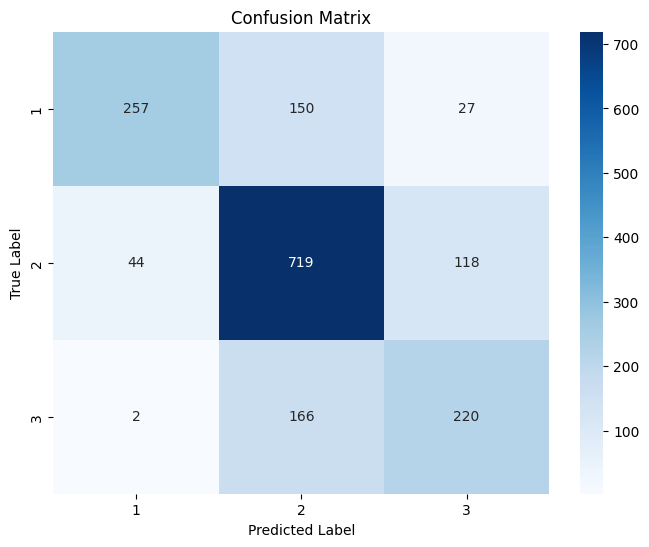

In [52]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

##### 3.2: Compute Precision, Recall, F1-score

In [53]:
# Calculate precision, recall and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Precision: 0.71
Recall: 0.70
F1-score: 0.70


##### 3.3: Check Feature Importance

In [54]:
# Check feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i+1}. feature {X.columns[indices[i]]} ({importances[indices[i]]:.4f})")

Feature ranking:
1. feature max_speed (0.2322)
2. feature avg_heart_rate (0.1695)
3. feature avg_altitude (0.1307)
4. feature max_speed_diff (0.1272)
5. feature total_time (0.1227)
6. feature max_heart_rate (0.1107)
7. feature max_altitude_diff (0.1069)


##### 3.3: Visualize Feature Importance

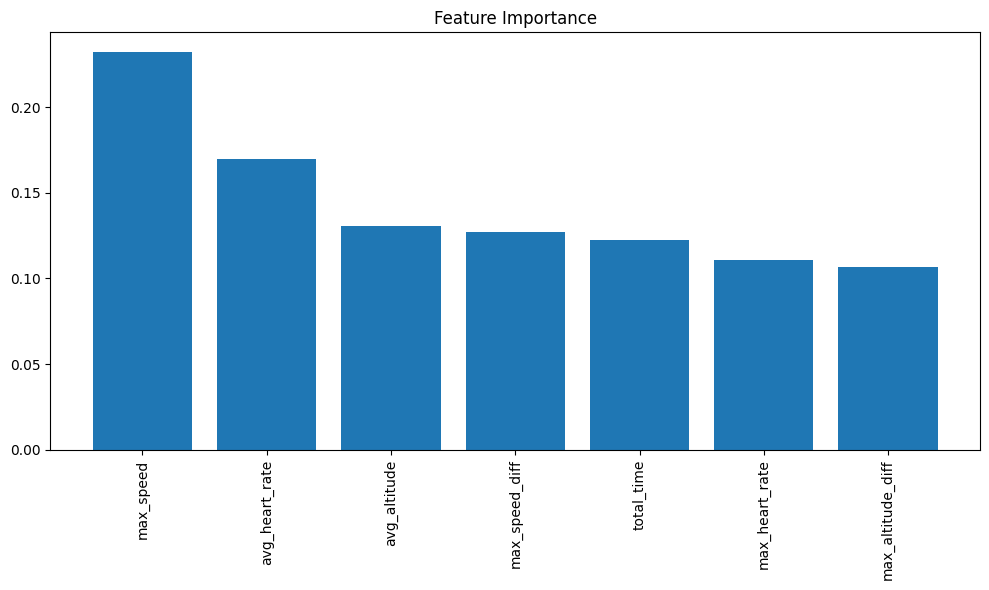

In [55]:
# Plot feature importance bar chart
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

#### Model Performance Evaluation:

The overall accuracy of the model is 70%, with uneven performance across the three categories. For category 1 (F1-score of 0.70), the recall is relatively low, indicating that some samples in this category were misclassified. Category 2 performs better, with an F1-score of 0.75, showing a good balance between precision and recall, and the model is more effective at identifying and predicting this category. Category 3 has weaker predictions, with an F1-score of 0.58, indicating lower precision and recall for this category. Overall, the macro average F1-score is 0.68, reflecting some disparity in the model's ability to predict different categories.

The feature importance ranking shows that maximum speed and average heart rate have the greatest impact on predictions, indicating that these features play a key role in assessing performance.